<a href="https://colab.research.google.com/github/PabloLBandeira/biblioteca-Pandas/blob/main/Desafio_07_Pablo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import libs and file

In [2]:
%%capture
%pip install sidetable

In [3]:
# libs importantes
import numpy as np
import pandas as pd
import sidetable

import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans, DBSCAN, MeanShift, AgglomerativeClustering
from sklearn.preprocessing import StandardScaler, scale
from sklearn.preprocessing import PowerTransformer

from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.preprocessing import MinMaxScaler


from yellowbrick.cluster import KElbowVisualizer
from google.colab import files

In [4]:
#upload da base de dados
clientes = pd.read_csv('/content/data.csv', encoding='latin-1')
clientes.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


# Describe, understanding and processing

In [5]:
clientes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [6]:
#transformação das colunas para o tipo correto de dado
clientes['InvoiceDate'] = pd.to_datetime(clientes['InvoiceDate'])

clientes['CustomerID'] = clientes['CustomerID'].astype(str)




In [7]:
clientes.describe()

,Quantity,InvoiceDate,UnitPrice
count,541909.000000,541909,541909.000000
mean,9.552250,2011-07-04 13:34:57.156386048,4.611114
min,-80995.000000,2010-12-01 08:26:00,-11062.060000
25%,1.000000,2011-03-28 11:34:00,1.250000
50%,3.000000,2011-07-19 17:17:00,2.080000
75%,10.000000,2011-10-19 11:27:00,4.130000
max,80995.000000,2011-12-09 12:50:00,38970.000000
std,218.081158,NaN,96.759853


In [8]:
clientes.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,1454
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,0
Country,0


In [9]:
# drop das linhas com valores nulos
clientes_processing = clientes.dropna(subset=['Description', 'Quantity', 'InvoiceDate', 'UnitPrice', 'Country'])
clientes_processing.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,0
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,0
Country,0


In [10]:
#identificando as duplicatas
duplicados = clientes[clientes.duplicated(keep=False)]
duplicados_por_coluna = {}
for coluna in duplicados.columns:
    duplicados_por_coluna[coluna] = duplicados[coluna].unique()
print(duplicados)

       InvoiceNo StockCode                       Description  Quantity  \
485       536409     22111      SCOTTIE DOG HOT WATER BOTTLE         1   
489       536409     22866     HAND WARMER SCOTTY DOG DESIGN         1   
494       536409     21866       UNION JACK FLAG LUGGAGE TAG         1   
517       536409     21866       UNION JACK FLAG LUGGAGE TAG         1   
521       536409     22900   SET 2 TEA TOWELS I LOVE LONDON          1   
...          ...       ...                               ...       ...   
541675    581538     22068       BLACK PIRATE TREASURE CHEST         1   
541689    581538     23318    BOX OF 6 MINI VINTAGE CRACKERS         1   
541692    581538     22992            REVOLVER WOODEN RULER          1   
541699    581538     22694                      WICKER STAR          1   
541701    581538     23343      JUMBO BAG VINTAGE CHRISTMAS          1   

               InvoiceDate  UnitPrice CustomerID         Country  
485    2010-12-01 11:45:00       4.95    179

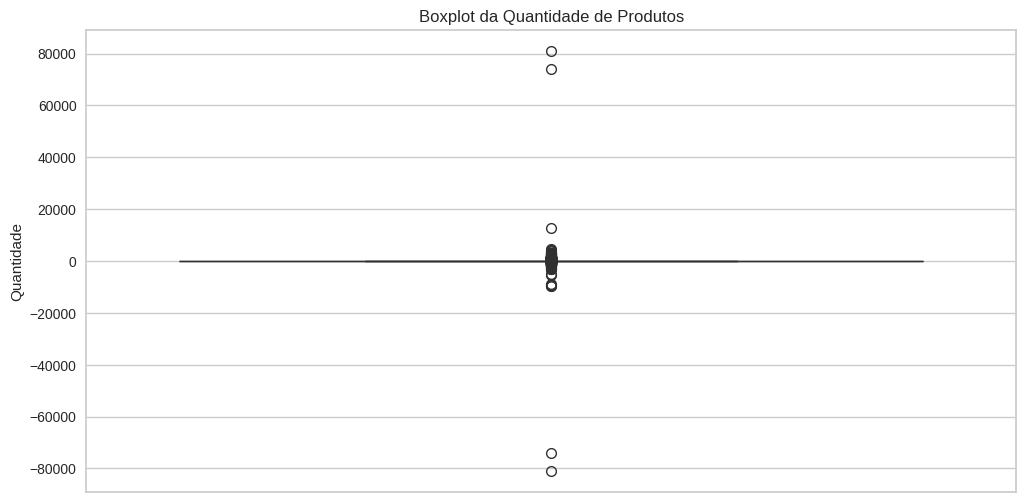

In [11]:
# outliers em Quantit
plt.figure(figsize=(12, 6))
sns.boxplot(y=clientes_processing['Quantity'])
plt.title('Boxplot da Quantidade de Produtos')
plt.ylabel('Quantidade')
plt.show()

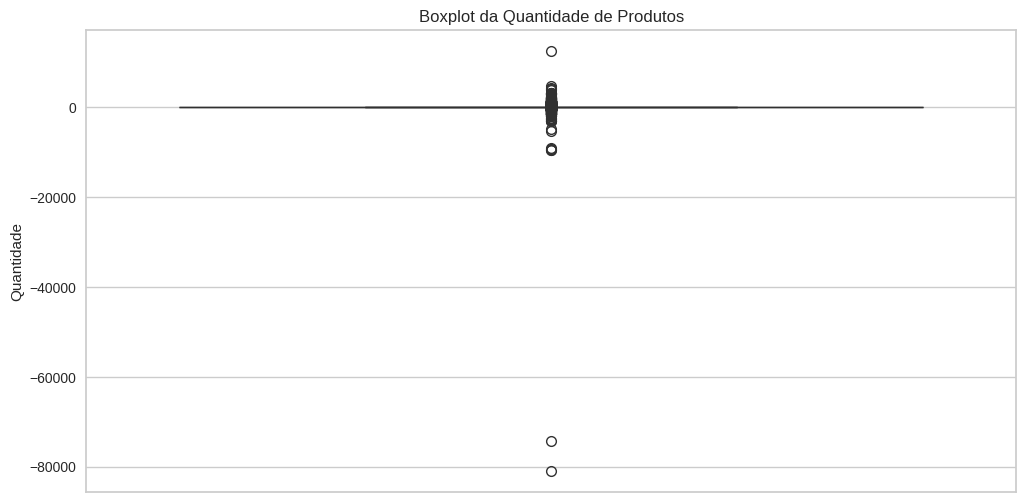

In [12]:
# drop de outliers
clientes_processing= clientes_processing[clientes_processing['Quantity'] <= 60000]
plt.figure(figsize=(12, 6))
sns.boxplot(y=clientes_processing['Quantity'])
plt.title('Boxplot da Quantidade de Produtos')
plt.ylabel('Quantidade')
plt.show()

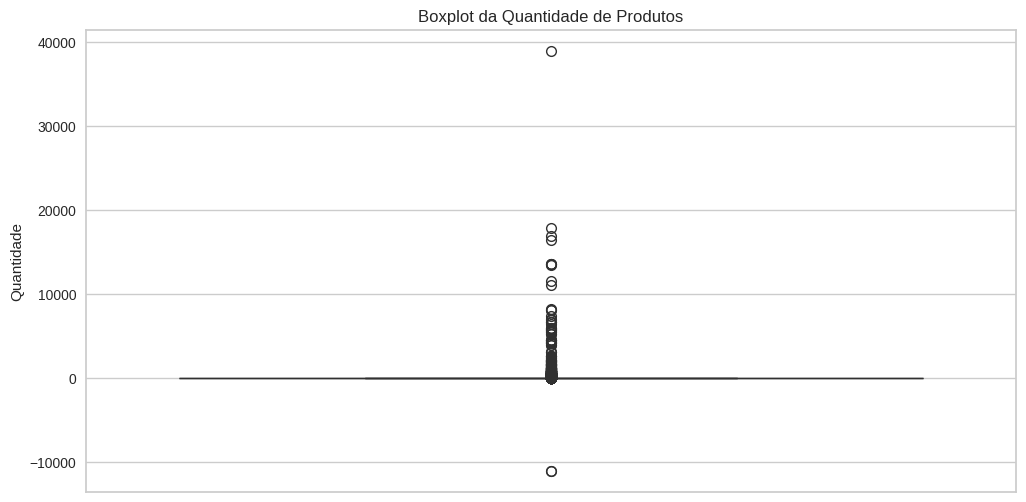

In [13]:
# outliers em UnitPrice
plt.figure(figsize=(12, 6))
sns.boxplot(y=clientes_processing['UnitPrice'])
plt.title('Boxplot da Quantidade de Produtos')
plt.ylabel('Quantidade')
plt.show()

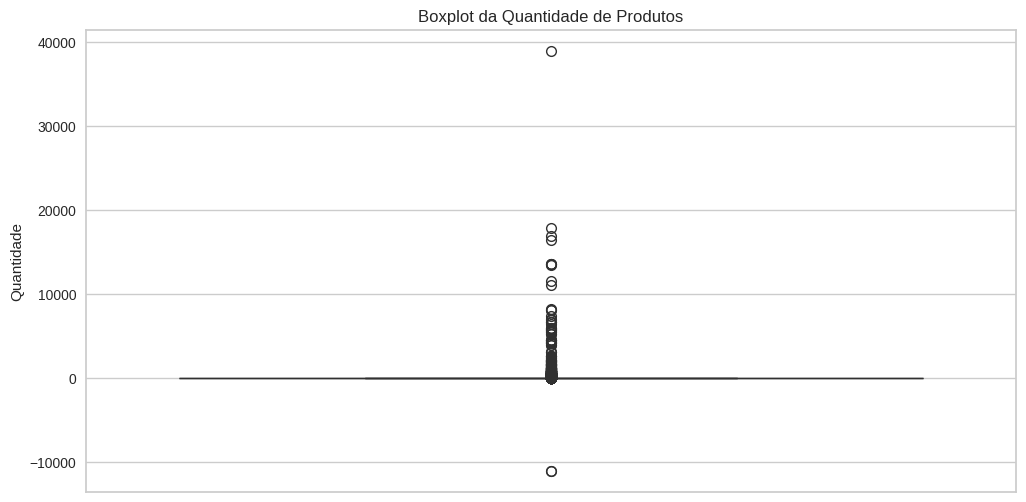

In [14]:
# drop de outliers
clientes_processing= clientes_processing[clientes_processing['Quantity'] <= 20000]
plt.figure(figsize=(12, 6))
sns.boxplot(y=clientes_processing['UnitPrice'])
plt.title('Boxplot da Quantidade de Produtos')
plt.ylabel('Quantidade')
plt.show()

In [15]:
# identificando valores negativos em quantidade
clientes_processing[clientes_processing['Quantity'] < 0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397.0,United Kingdom
541541,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.0,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.0,United Kingdom


In [16]:
# drop de negativos
clientes_processing = clientes_processing[clientes_processing['Quantity'] >= 0]
(clientes_processing['Quantity'] < 0).any()


False

In [17]:
# identificando valores negativos em UnitPrice
(clientes_processing['Quantity'] < 0).any()

False

In [18]:
clientes_processing.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


# Escolha de colunas relevantes

In [19]:
# escolha e criação de dados relevantes
clientes_processing['TotalValue'] = clientes_processing['Quantity'] * clientes_processing['UnitPrice'].copy()
clientes_processing.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalValue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [20]:
#contagem única por país
contagem_unica_country = clientes_processing['Country'].value_counts()
print(contagem_unica_country)


Country
United Kingdom          485692
Germany                   9042
France                    8408
EIRE                      7894
Spain                     2485
Netherlands               2363
Belgium                   2031
Switzerland               1967
Portugal                  1501
Australia                 1185
Norway                    1072
Italy                      758
Channel Islands            748
Finland                    685
Cyprus                     614
Sweden                     451
Unspecified                446
Austria                    398
Denmark                    380
Poland                     330
Japan                      321
Israel                     295
Hong Kong                  284
Singapore                  222
Iceland                    182
USA                        179
Canada                     151
Greece                     145
Malta                      112
United Arab Emirates        68
European Community          60
RSA                         58


In [21]:
#normalização dos dados
scaler_min_max = MinMaxScaler()
colunas_para_normalizar = ['Quantity', 'UnitPrice', 'TotalValue']
clientes_processing[colunas_para_normalizar] = scaler_min_max.fit_transform(clientes_processing[colunas_para_normalizar])

In [22]:
clientes_processing.tail().sort_values(by='InvoiceDate', ascending=False)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalValue
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,0.000877,2011-12-09 12:50:00,0.449650,12680.0,France,0.221303
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,0.000399,2011-12-09 12:50:00,0.449701,12680.0,France,0.221351
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,0.000239,2011-12-09 12:50:00,0.449784,12680.0,France,0.221431
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,0.000239,2011-12-09 12:50:00,0.449784,12680.0,France,0.221431
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,0.000160,2011-12-09 12:50:00,0.449816,12680.0,France,0.221396


Foram escolhidas somente as colunas Quantity, UnitPrice e TotalValue para a cluesteriazação. Após esta primeira análise, caso faça sentido, podemos utlizar o modelo k-prototype para incluir a coluna Description.
A coluna Country não foi considerada, pois o United Kingdon, país com mais vendas, tem 40.000 entradas a mais do que Germany, o segundo colocado.

#Cálculo RFV

In [23]:
data_referencia = pd.Timestamp('2012-02-01') #como a base é muito antiga padronizamos a data de cálculo para 01 de fevereiro de 2012.

rfv_df = clientes_processing.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (data_referencia - x.max()).days,
    'InvoiceNo': 'count',
    'TotalValue': 'sum'
}).reset_index()

rfv_df.rename(columns={
    'InvoiceDate': 'Recency',
    'InvoiceNo': 'Frequency',
    'TotalValue': 'Value'
}, inplace=True)

print(rfv_df.head())

  CustomerID  Recency  Frequency      Value
0    12347.0       55        182  40.326241
1    12348.0      128         31   6.890004
2    12349.0       71         73  16.175387
3    12350.0      363         17   3.765374
4    12352.0       89         85  18.843540


In [24]:
rfv_df.head()

,CustomerID,Recency,Frequency,Value
0,12347.0,55,182,40.326241
1,12348.0,128,31,6.890004
2,12349.0,71,73,16.175387
3,12350.0,363,17,3.765374
4,12352.0,89,85,18.843540


# Selecting cluster model

In [25]:
rfv_df = rfv_df.drop('CustomerID', axis=1)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

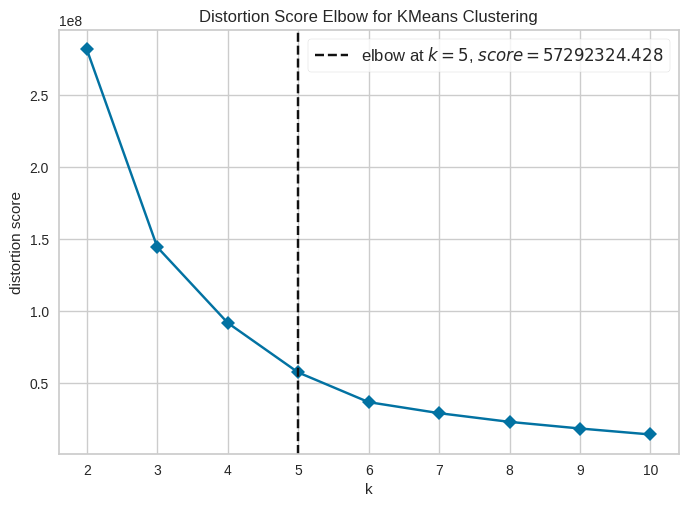

In [26]:
plt.figure()

kelbow_visualizer = KElbowVisualizer(KMeans(), k=10, timings=False)
kelbow_visualizer.fit(rfv_df)
kelbow_visualizer.show()
plt.show()


In [27]:
# método elbow para testar o número de clusters
X = rfv_df

cluster_metrics = silhouette_score, davies_bouldin_score, calinski_harabasz_score
cluster_metrics_results = []

for k in range(2, 11):
    model = KMeans(n_clusters=k, random_state=0)
    labels = model.fit_predict(X)

    cluster_results_dict = {'k': k}
    cluster_results_dict['inertia'] = model.inertia_

    for metric in cluster_metrics:
        cluster_results_dict[metric.__name__] = metric(X, labels)

    cluster_metrics_results.append(cluster_results_dict)

pd.DataFrame(cluster_metrics_results).set_index('k').style.background_gradient()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

,inertia,silhouette_score,davies_bouldin_score,calinski_harabasz_score
k,,,,
2,281540282.950268,0.998379,0.000985,284392.190225
3,144286581.382560,0.968563,0.135937,279459.556825
4,91730541.165736,0.653191,0.402631,293878.377359
5,57313485.601907,0.560831,0.413418,353359.348464
6,36676429.833931,0.576878,0.424391,442001.281176
7,29007764.864224,0.544680,0.461794,466028.288900
8,23216988.129827,0.511940,0.430422,499433.201038
9,18748650.026243,0.485537,0.456060,540776.130369
10,14275025.513184,0.484012,0.468235,631578.363002


Testando o K-means

In [28]:
rfv_df.head()

,Recency,Frequency,Value
0,55,182,40.326241
1,128,31,6.890004
2,71,73,16.175387
3,363,17,3.765374
4,89,85,18.843540


In [29]:
kmeans = KMeans(4)
kmeans_labels = kmeans.fit_predict(rfv_df)
px.scatter_3d(rfv_df, x='Recency', y='Frequency', z='Value', color=kmeans_labels.astype(str), template='plotly_dark')

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


# Kmeans conclusão
Utilizando o método Kmeans não foi possível notar uma separação entre os cluester, impedindo de identificar o padrão dos usuários

#  Hierarchical Clustering

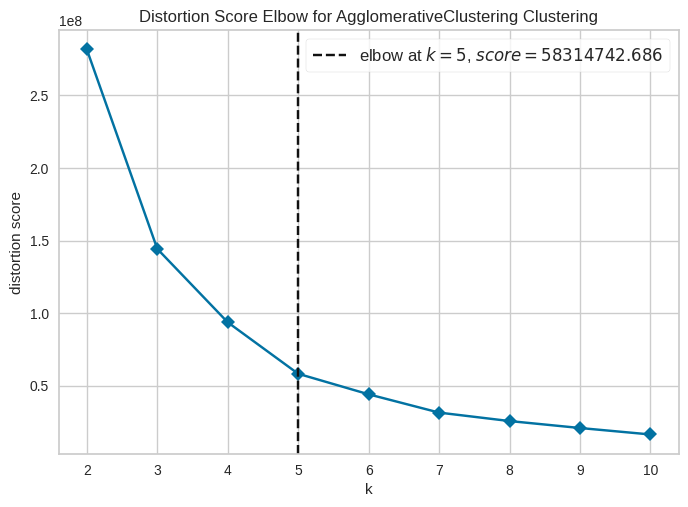

In [30]:
plt.figure()

kelbow_visualizer = KElbowVisualizer(AgglomerativeClustering(), k=10, timings=False)
kelbow_visualizer.fit(rfv_df)
kelbow_visualizer.show()
plt.show()

In [31]:
cluster_metrics = silhouette_score, davies_bouldin_score, calinski_harabasz_score
cluster_metrics_results = []
X = rfv_df.copy()

for k in range(2,11):
  model = AgglomerativeClustering(n_clusters=k)
  labels = model.fit_predict(X)
  cluster_results_dict = {'k': k}
  # cluster_results_dict['inertia'] = model.inertia_
  for metric in cluster_metrics:
    cluster_results_dict[metric.__name__] = metric(X, labels)
  cluster_metrics_results.append(cluster_results_dict)

pd.DataFrame(cluster_metrics_results).set_index('k').style.background_gradient()

,silhouette_score,davies_bouldin_score,calinski_harabasz_score
k,,,
2,0.998379,0.000985,284392.190225
3,0.968563,0.135937,279459.556825
4,0.731138,0.360906,287510.952696
5,0.528259,0.441233,347167.494598
6,0.527401,0.434749,366835.824307
7,0.473837,0.484469,427721.346706
8,0.473818,0.424135,449381.461323
9,0.454321,0.468043,482922.705622
10,0.452024,0.505120,544827.894867


In [32]:
hclust = AgglomerativeClustering(n_clusters=2)
hclust_labels = hclust.fit_predict(rfv_df)


In [33]:
px.scatter_3d(rfv_df, x='Recency', y='Frequency', z='Value', color=hclust_labels.astype(str), template='plotly_dark')

# Gaussian Mixture

In [34]:
results = []
k_range = range(1,9)
covariance_types = ['full', 'tied', 'diag', 'spherical']
X = rfv_df.copy()

for n_components in k_range:
  for covariance_type in covariance_types:
    mclust = GaussianMixture(n_components=n_components, n_init=10, warm_start=True, covariance_type=covariance_type)
    mclust.fit(X)
    results.append({
      'bic': mclust.bic(X),
      'n_components': n_components,
      'covariance_type': covariance_type,
    })

results = pd.DataFrame(results)
results.sort_values('bic').head()

,bic,n_components,covariance_type
28,69408.735079,8,full
24,70045.686721,7,full
20,71010.265760,6,full
16,72331.384228,5,full
12,75111.334506,4,full


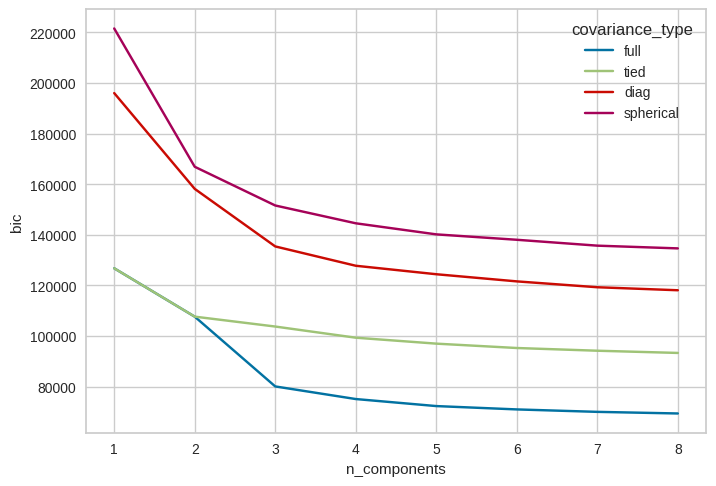

In [35]:
sns.lineplot(data=results, x='n_components', y='bic', hue='covariance_type');

In [36]:
mclust = GaussianMixture(n_components=3, covariance_type='full', n_init=10)
mclust_labels = mclust.fit_predict(rfv_df)

In [37]:
px.scatter_3d(rfv_df, x='Recency', y='Frequency', z='Value', color=mclust_labels.astype(str), template='plotly_dark')

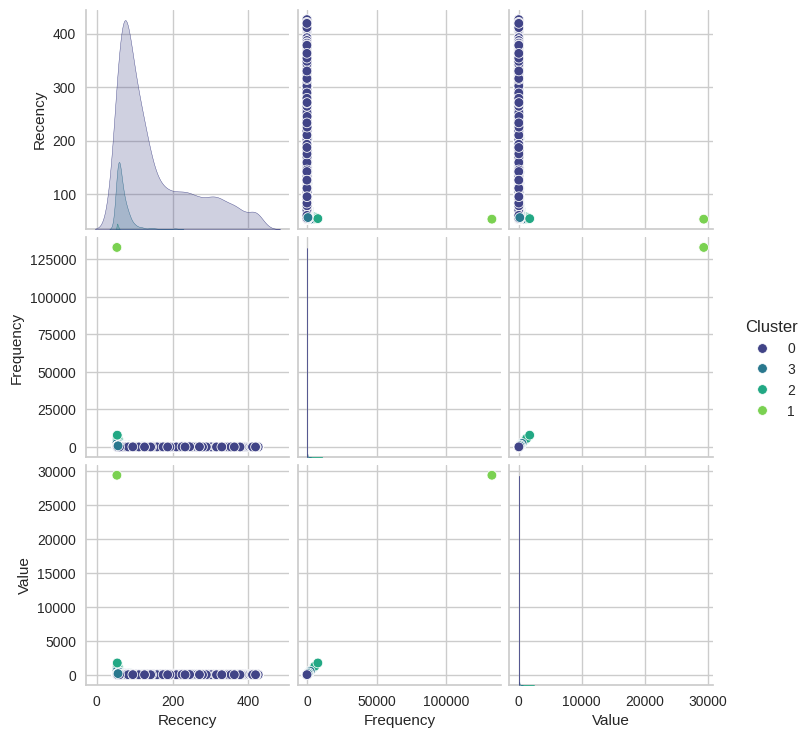

In [40]:
# Copiar o dataframe e adicionar a coluna com os clusters
df_rfv_with_labels = rfv_df.copy()
df_rfv_with_labels['Cluster'] = kmeans_labels.astype(str)  # Adiciona as labels como uma nova coluna

# Plota o pairplot
sns.pairplot(df_rfv_with_labels, hue='Cluster', palette='viridis')

# Exibe o plot
plt.show()

In [41]:
# Contar a quantidade de registros em cada cluster
cluster_counts = df_rfv_with_labels['Cluster'].value_counts()

# Calcular o percentual de cada cluster
cluster_percentages = (cluster_counts / len(df_rfv_with_labels)) * 100

# Exibir o resultado
percentual_clusters = pd.DataFrame({'Cluster': cluster_counts.index, 'Count': cluster_counts.values, 'Percentage': cluster_percentages.values})
percentual_clusters.sort_values(by='Cluster')

,Cluster,Count,Percentage
0,0,4028,92.832450
3,1,1,0.023047
2,2,4,0.092187
1,3,306,7.052316
